In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
#Dataset is already avilable
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
X_test.shape # total 10000 matrix and each matrix is of 28*28

(10000, 28, 28)

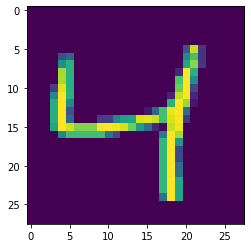

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [8]:
#kind of standadization for easy conversion
X_train = X_train/255
X_test = X_test/255

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2861 - accuracy: 0.9170 - val_loss: 0.1480 - val_accuracy: 0.9555
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1194 - accuracy: 0.9644 - val_loss: 0.1109 - val_accuracy: 0.9662
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0821 - accuracy: 0.9749 - val_loss: 0.0982 - val_accuracy: 0.9696
Epoch 4/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9805 - val_loss: 0.0903 - val_accuracy: 0.9738
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0954 - val_accuracy: 0.9741
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0373 - accuracy: 0.9876 - val_loss: 0.0976 - val_accuracy: 0.9722
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0312 - accuracy: 0.9894 - val_loss: 0.1004 - val_accuracy:

In [13]:
y_prob = model.predict(X_test)

In [14]:
y_pred = y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.979

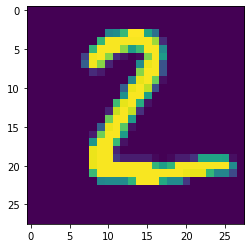

In [16]:
plt.imshow(X_test[1])

In [17]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2])